<a href="https://colab.research.google.com/github/suafle/obs_astrophysics/blob/master/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

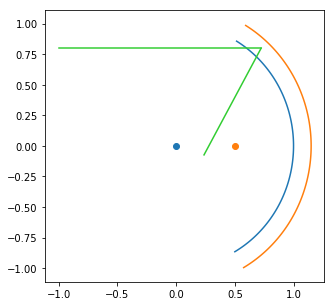

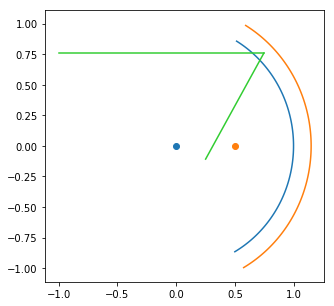

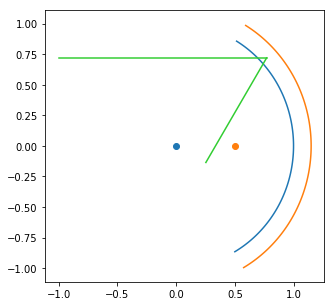

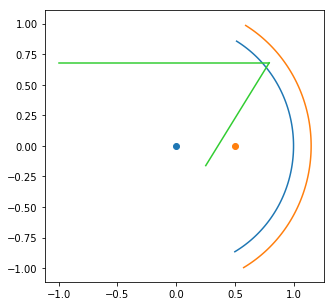

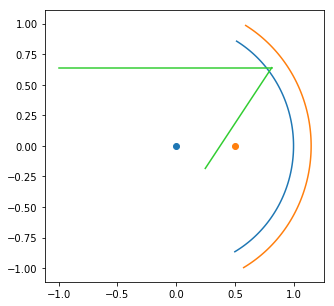

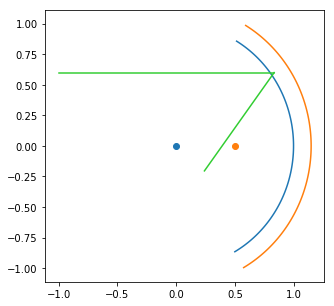

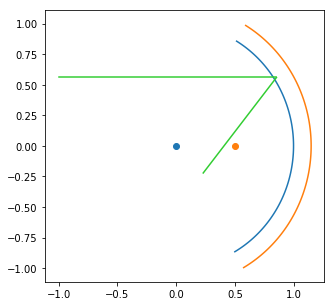

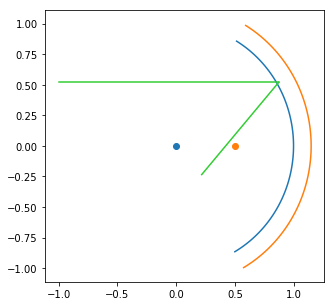

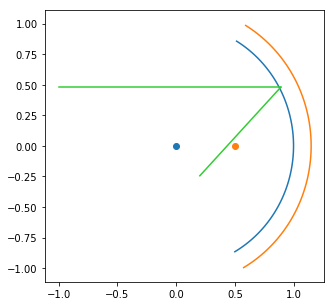

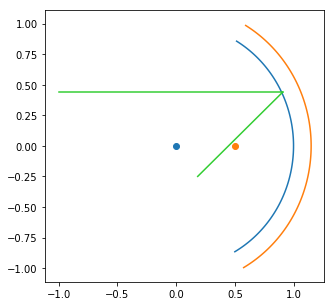

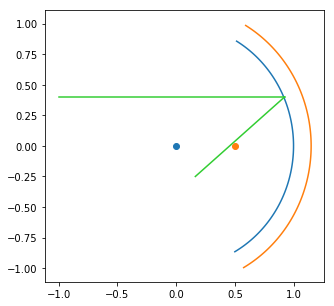

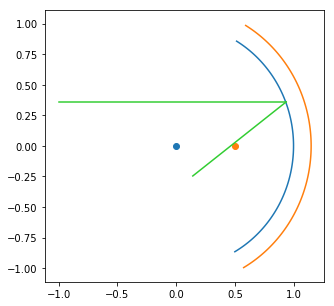

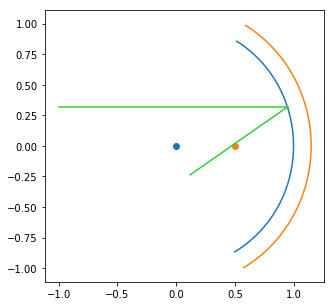

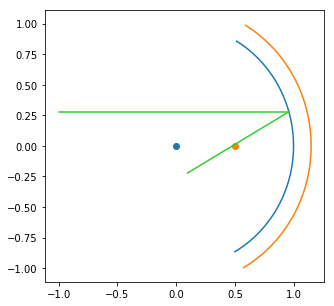

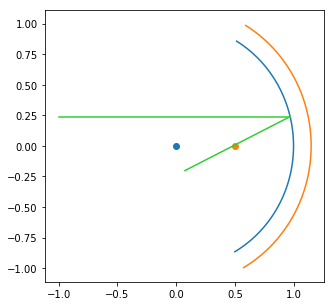

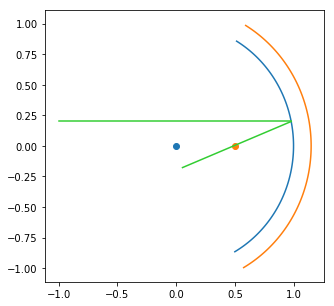

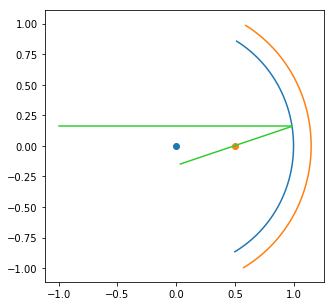

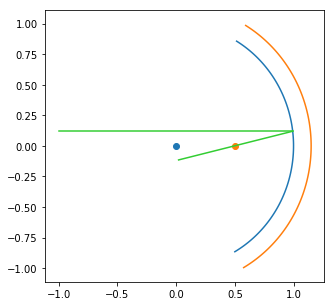

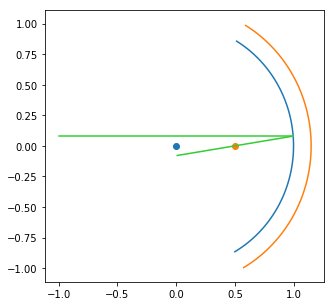

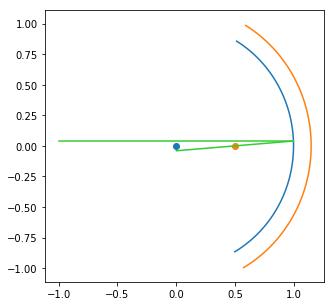

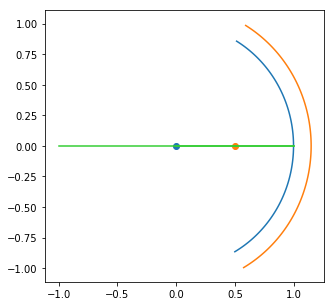

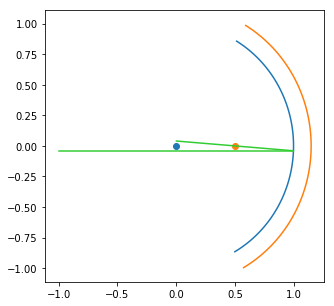

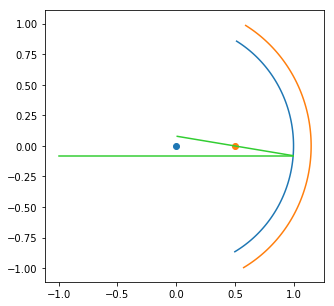

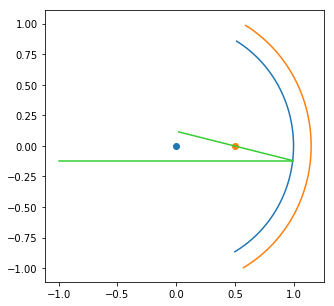

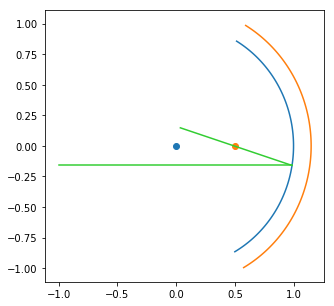

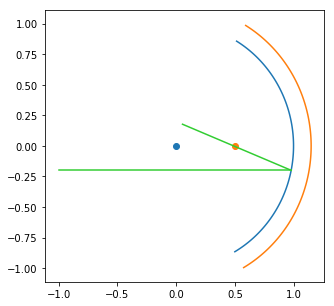

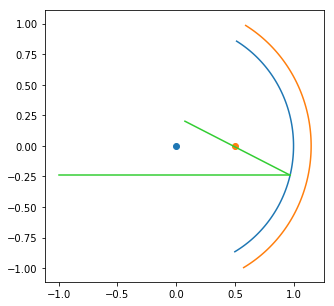

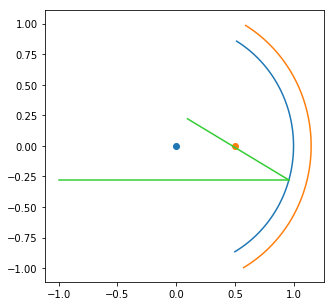

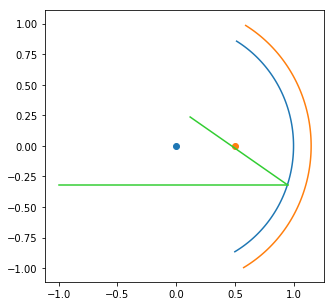

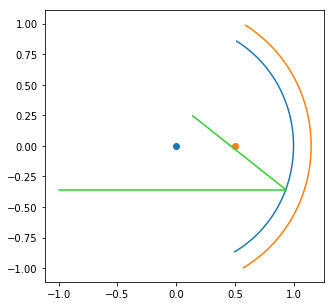

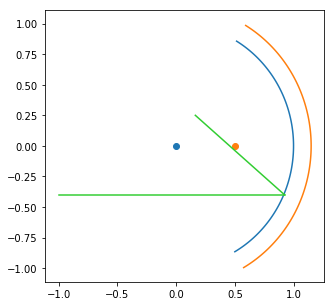

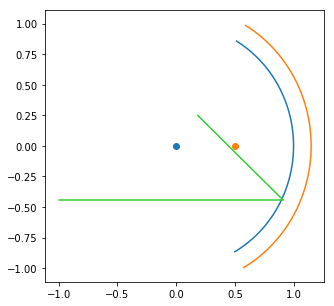

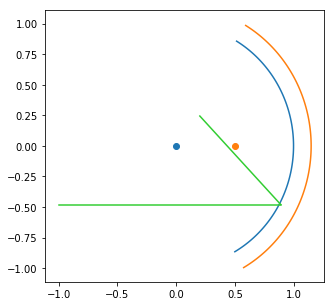

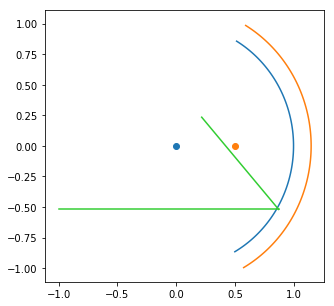

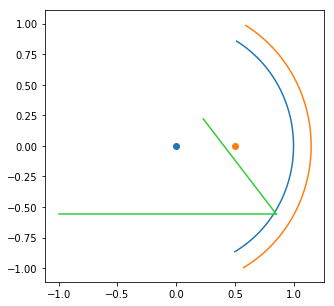

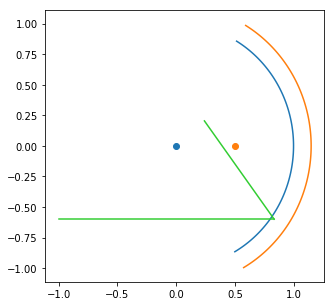

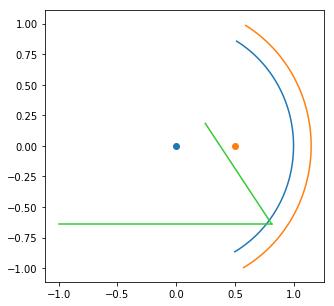

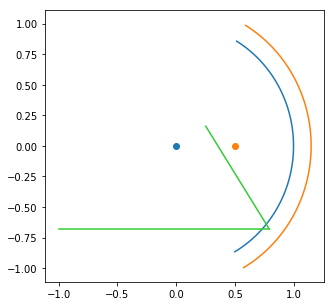

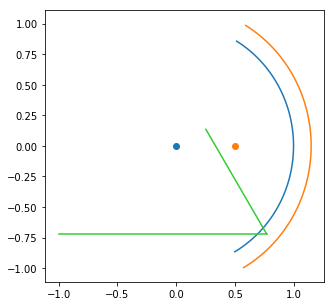

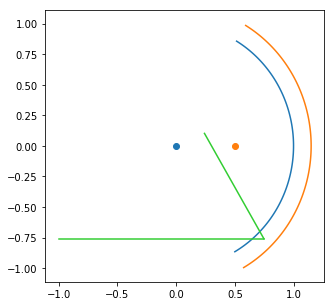

In [41]:
#Spheric mirror
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 1.
x = r*np.cos(ii)
y = r*np.sin(ii)

plt.rcParams["figure.figsize"] = (5,5)

delta = -0.04
dy = np.arange(0.80,-0.80,delta)
angles = 2.*np.arctan(dy/2.)
dx = 1.0*np.cos(angles)
tangentx = np.gradient(dx,2)
tangenty = np.gradient(dy,2)  
alpha = np.arctan(tangentx/tangenty) #angle between tangent and incoming horizontal ray
reflectedx = -np.cos(2.*alpha) + dx #refelcted ray
reflectedy = np.sin(2.*alpha) + dy #refelcted ray

for i in range(0,len(dx)):
  plt.scatter([-1,1],[-1,1],color='white')
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  plt.plot(x,y) #mirror
  plt.plot(x*1.15,y*1.15) #mirror  
  plt.plot([-1,dx[i]],[dy[i],dy[i]],color='limegreen') #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen') #reflected ray
  plt.show()
  plt.close()

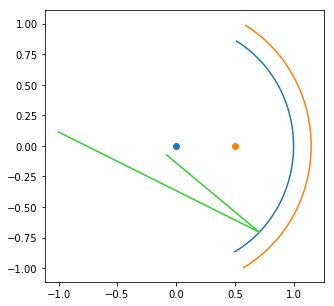

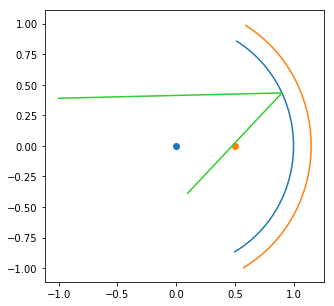

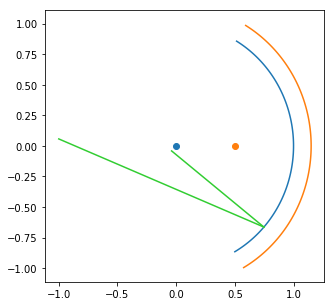

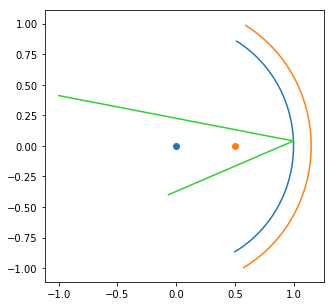

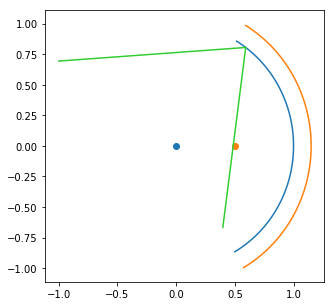

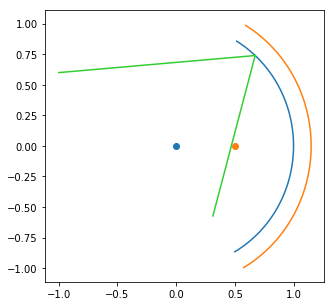

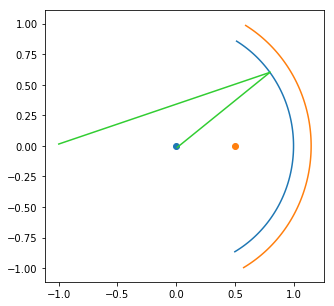

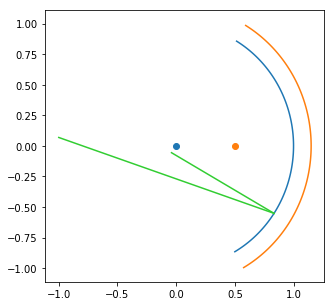

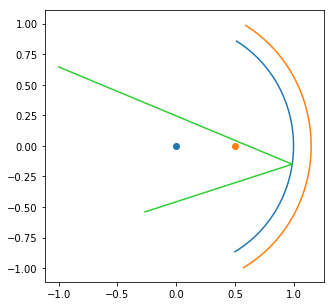

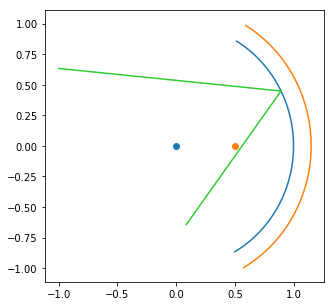

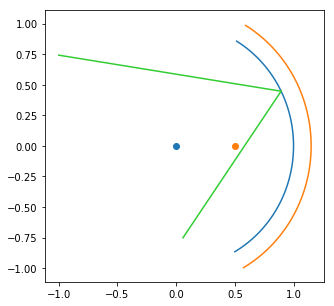

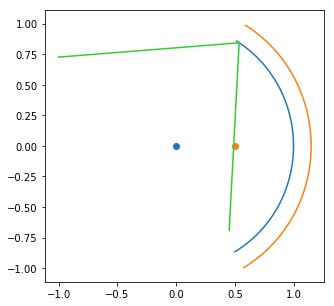

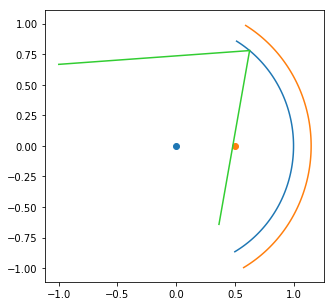

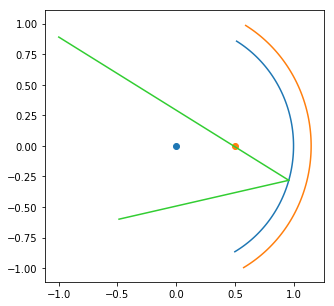

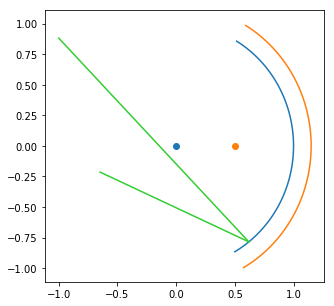

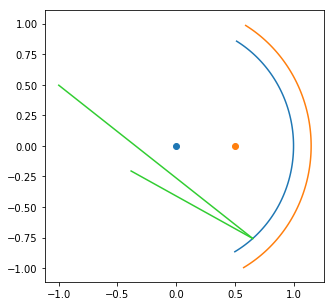

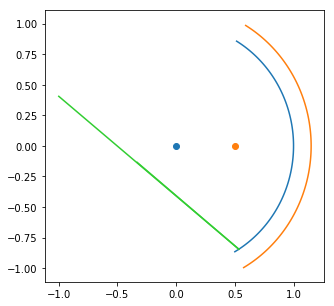

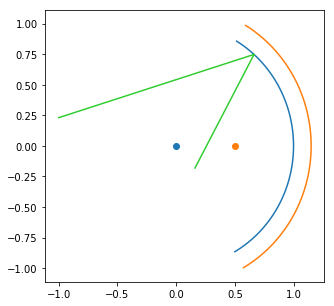

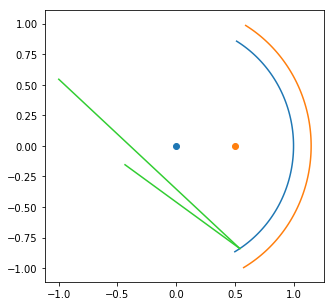

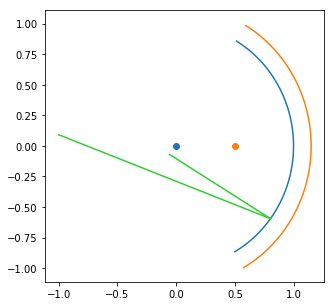

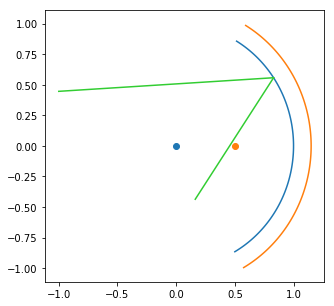

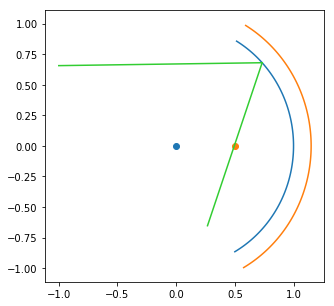

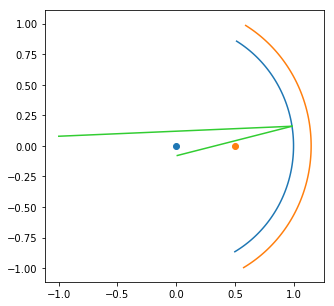

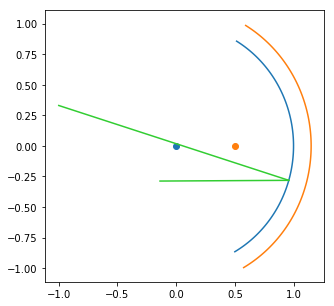

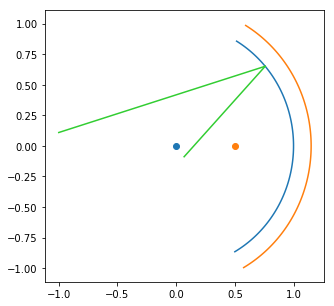

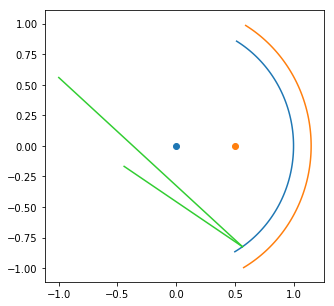

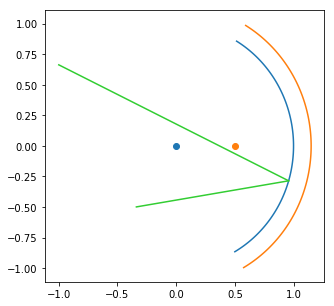

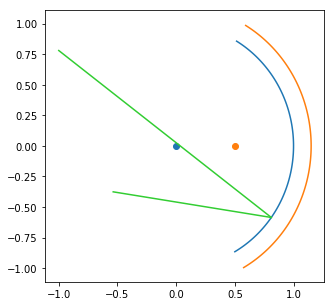

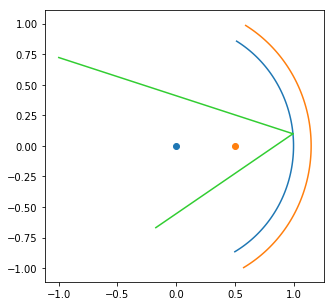

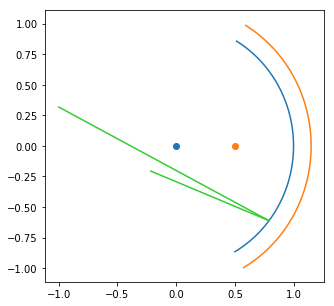

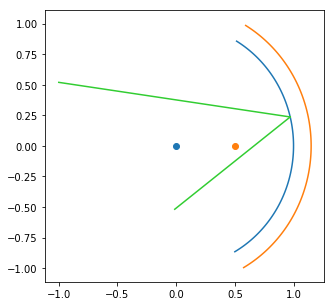

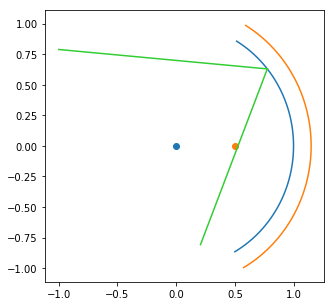

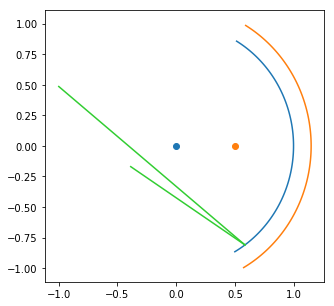

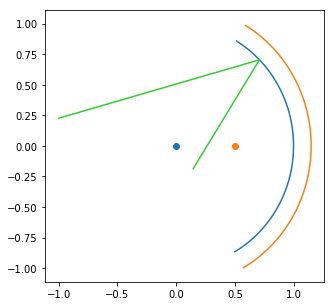

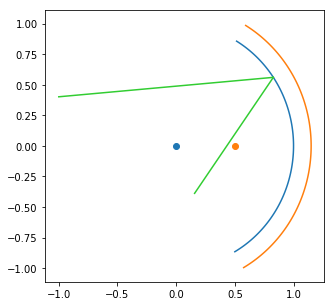

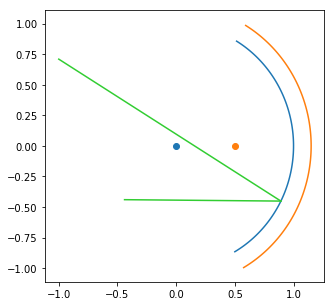

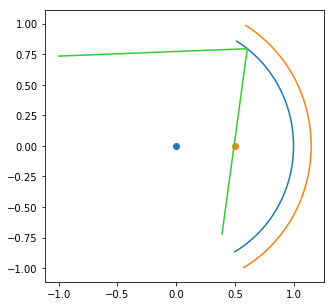

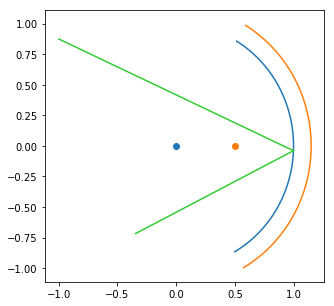

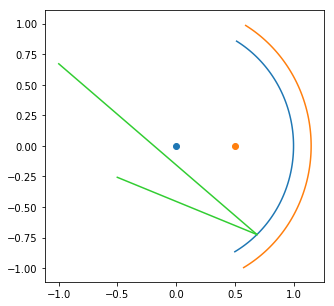

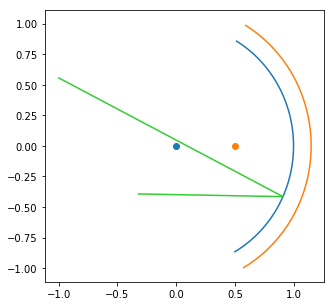

In [40]:
#Spheric mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 1.
x = r*np.cos(ii)
y = r*np.sin(ii)

plt.rcParams["figure.figsize"] = (5,5)

#random rays
x1 = -1.0*np.ones(40)
y1 = np.random.random(40)
x2 = 0.5*np.ones(40)
y2 = np.random.uniform(-np.sqrt(1. - 0.5**2),np.sqrt(1. - 0.5**2),40)

#Interction sphere and line (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n + np.sqrt(1. - n**2 + m**2))/(1. + m**2)
dy = m*dx + n
  
dx_minu = dx - 0.001
dx_plus = dx + 0.001
dy_minu = m*dx_minu + n
dy_plus = m*dx_plus + n

tangentx = dx_plus - dx_minu
tangenty = dy_plus - dy_minu
alpha = np.arctan(tangentx/tangenty) #angle between tangent and incoming horizontal ray
reflectedx = -np.cos(2.*alpha) - dx #refelcted ray
reflectedy = np.sin(2.*alpha) - dy #refelcted ray

for i in range(0,len(dx)):
  plt.scatter([-1,1],[-1,1],color='white')
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  plt.plot(x,y) #mirror
  plt.plot(x*1.15,y*1.15) #mirror  
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen') #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen') #reflected ray
  plt.show()
  plt.close()

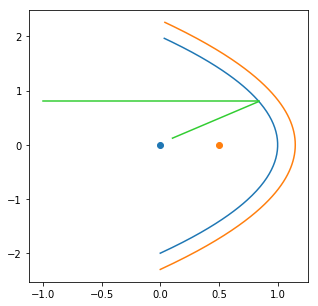

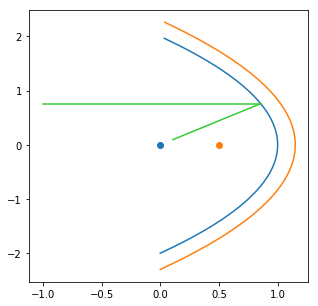

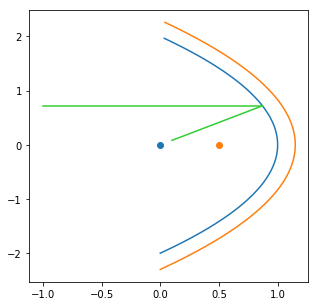

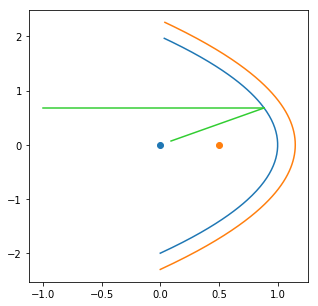

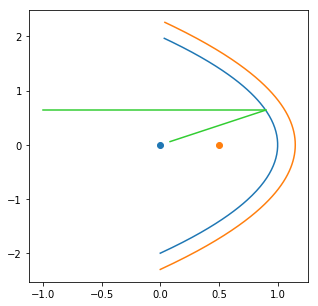

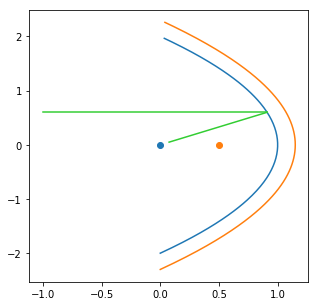

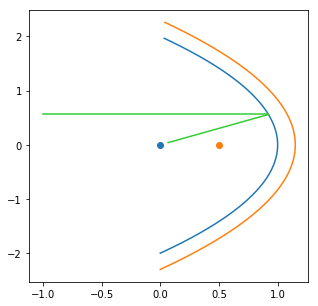

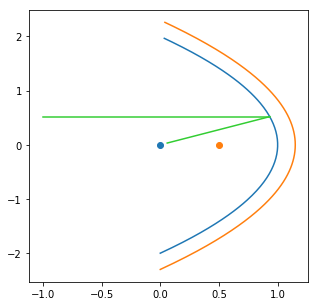

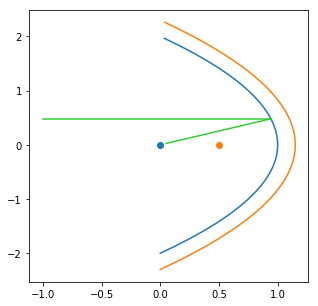

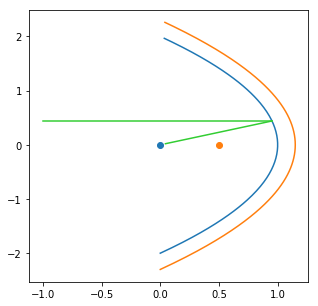

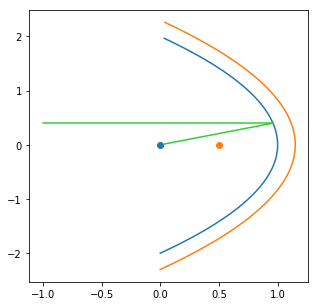

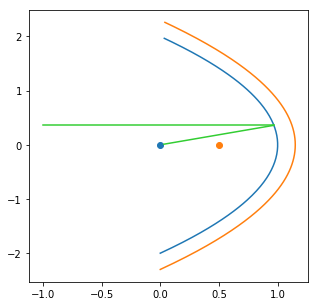

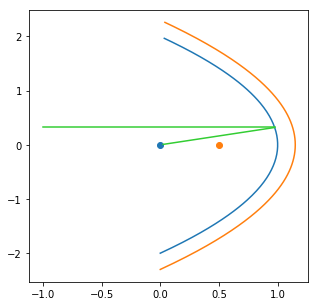

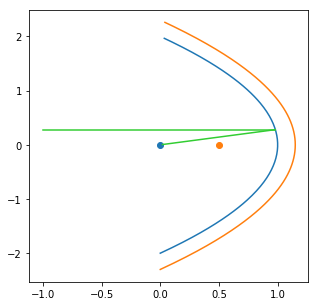

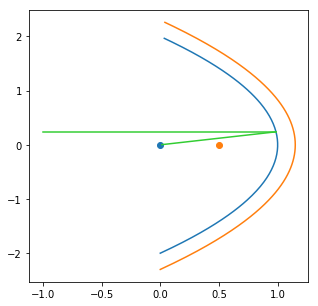

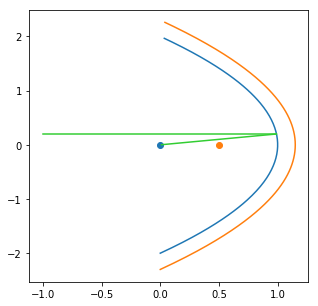

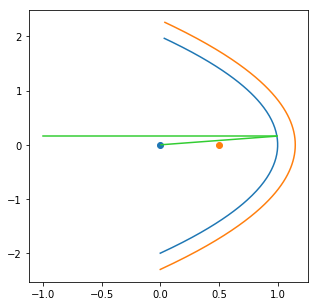

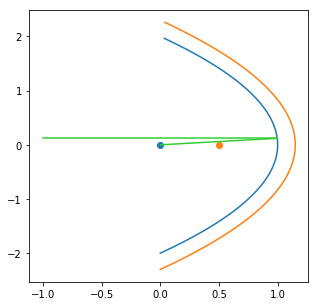

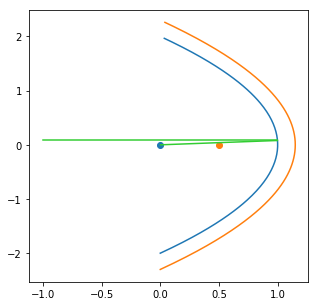

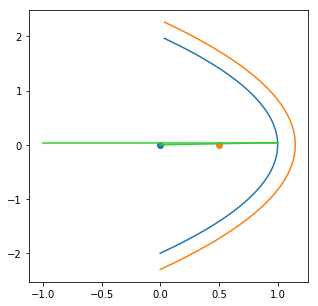

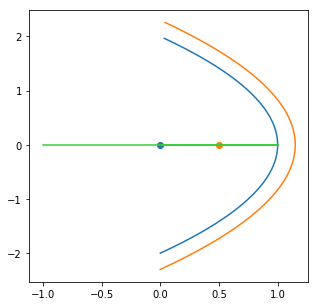

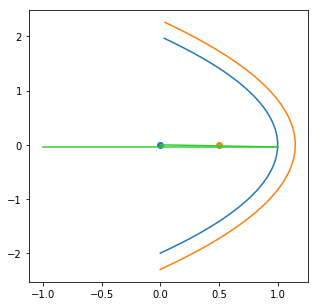

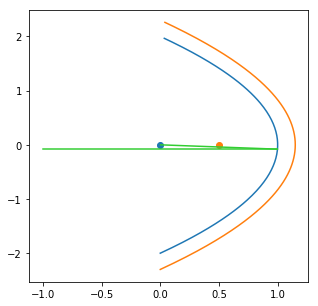

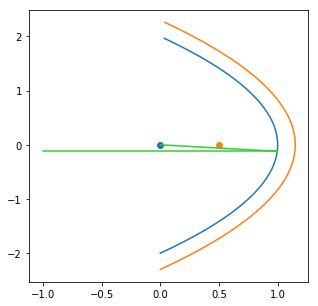

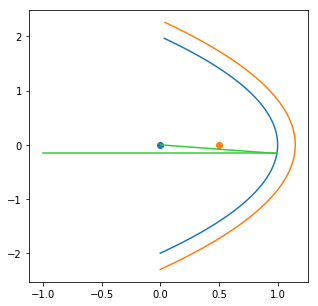

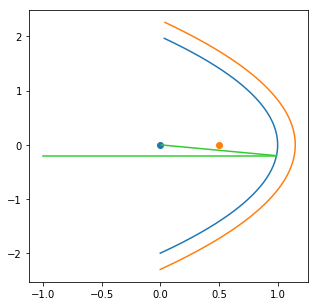

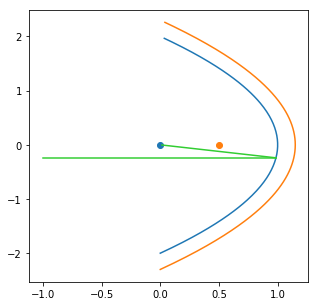

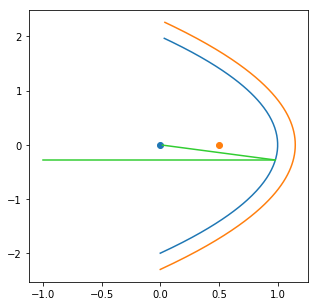

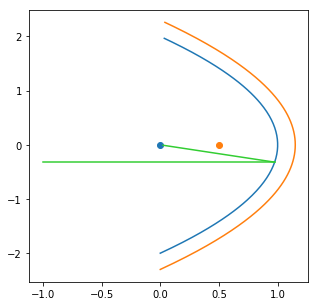

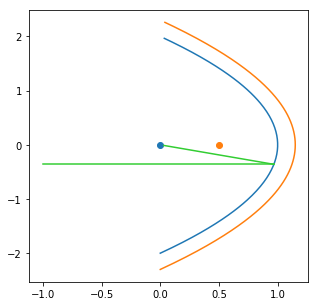

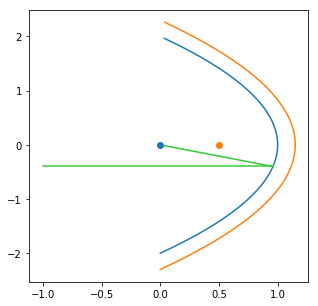

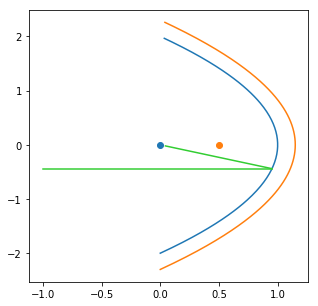

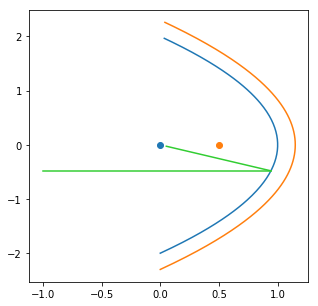

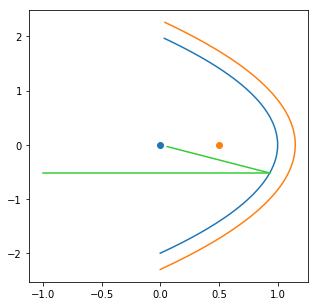

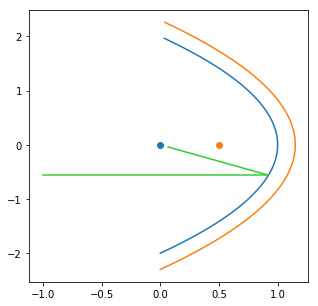

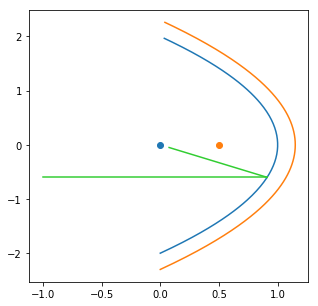

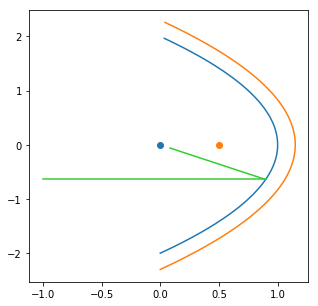

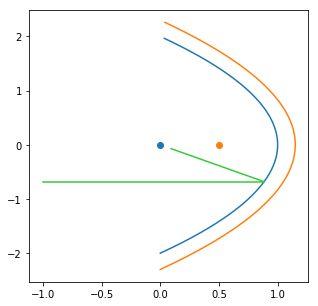

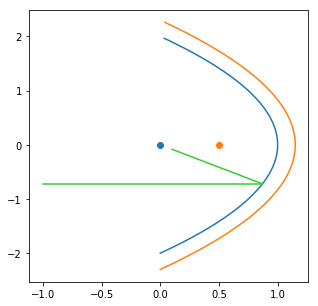

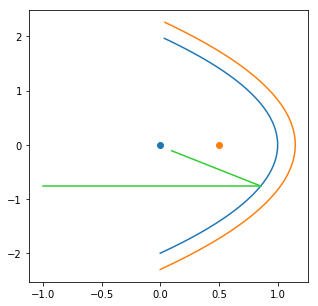

In [43]:
#Parabolic mirror
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)
#En cartesianas y**2 = -4*(x-1)

plt.rcParams["figure.figsize"] = (5,5)

delta = -0.04
dy = np.arange(0.80,-0.80,delta)
angles = 2*np.arctan(dy/2)
dx = (2./(1 + np.cos(angles)))*np.cos(angles)
tangentx = np.gradient(dx,2)
tangenty = np.gradient(dy,2)  
alpha = np.arctan(tangentx/tangenty) #angle between tangent and incoming horizontal ray
reflectedx = -np.cos(2.*alpha) + dx #refelcted ray
reflectedy = np.sin(2.*alpha) + dy #refelcted ray

for i in range(0,len(dx)):
  plt.scatter([-1,1],[-1,1],color='white')
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  plt.plot(x,y) #mirror
  plt.plot(x*1.15,y*1.15) #mirror  
  plt.plot([-1,dx[i]],[dy[i],dy[i]],color='limegreen') #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen') #reflected ray
  plt.show()
  plt.close()

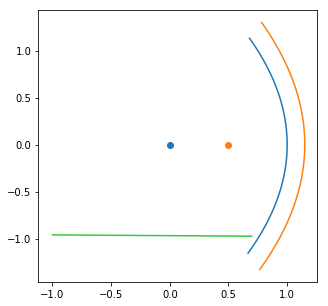

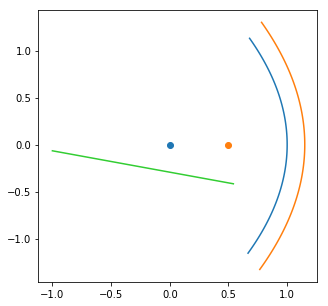

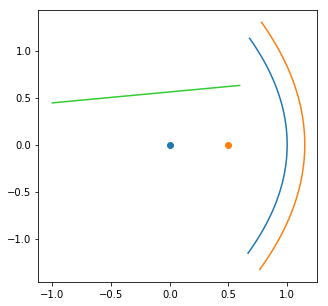

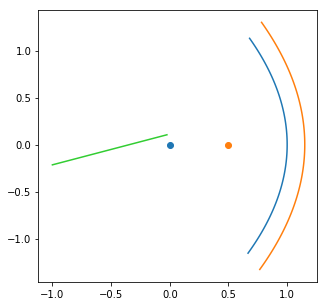

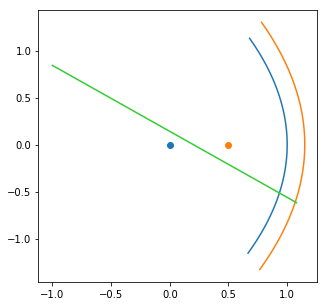

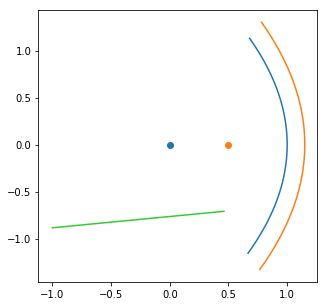

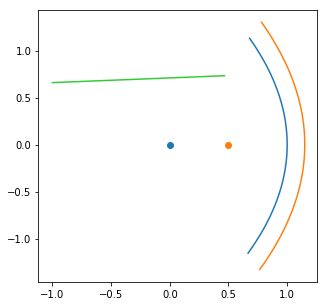

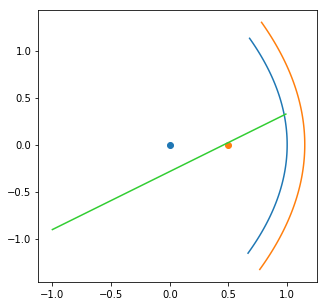

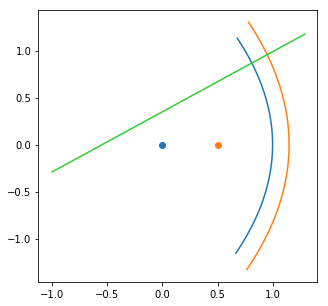

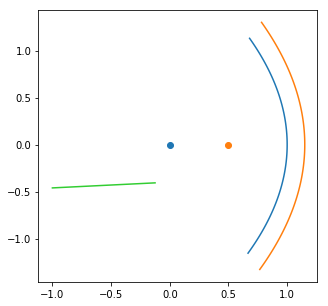

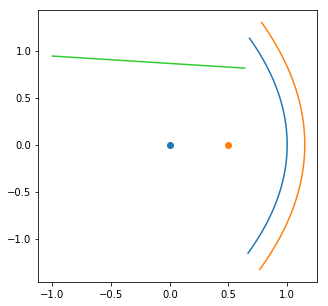

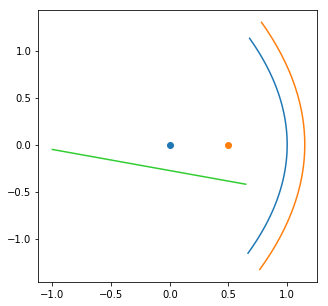

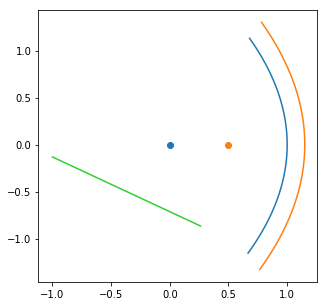

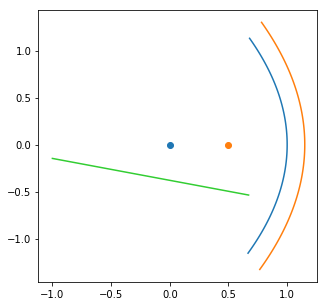

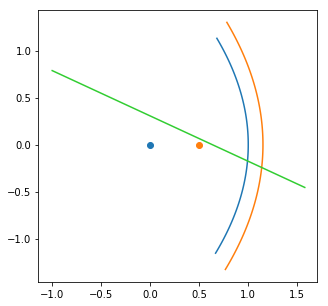

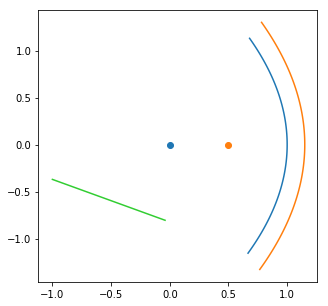

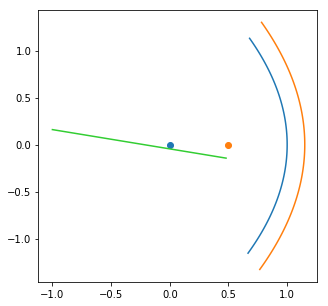

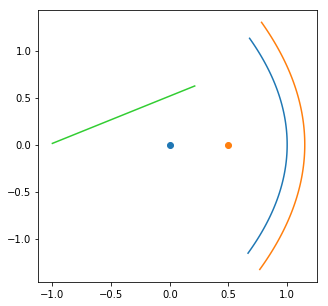

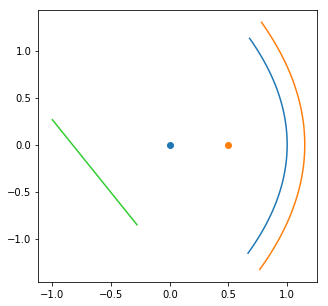

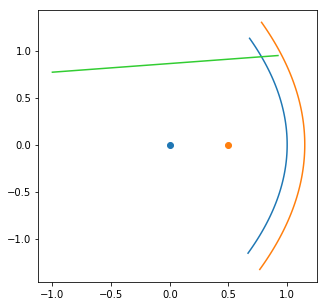

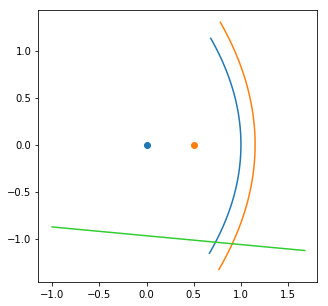

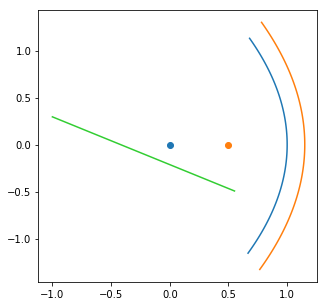

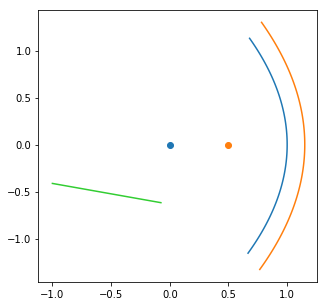

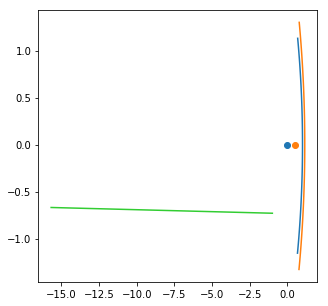

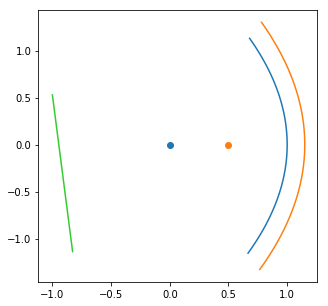

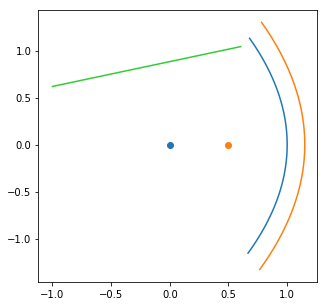

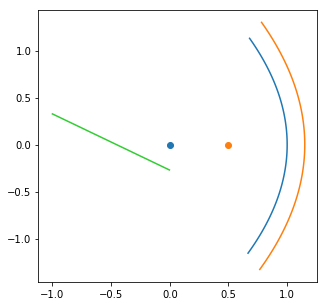

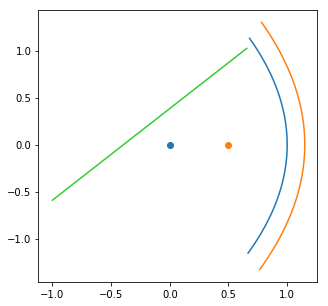

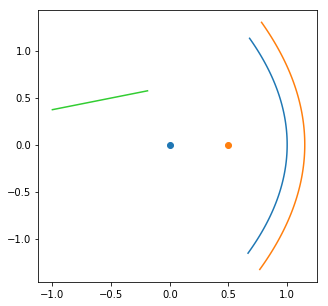

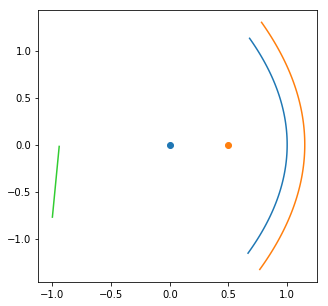

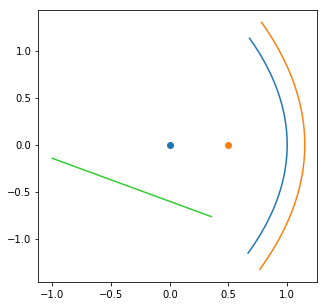

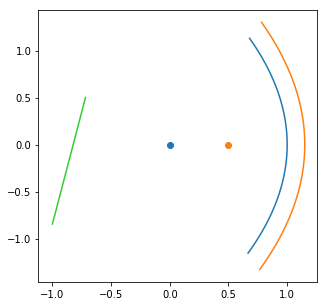

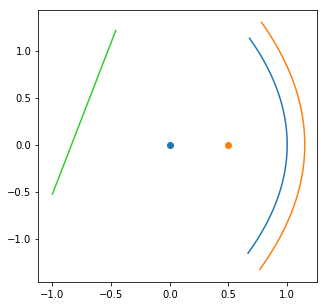

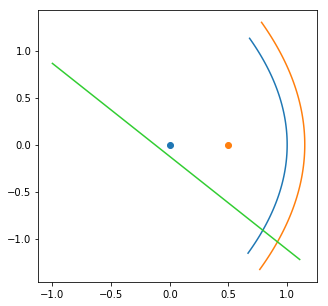

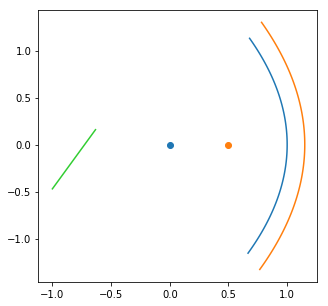

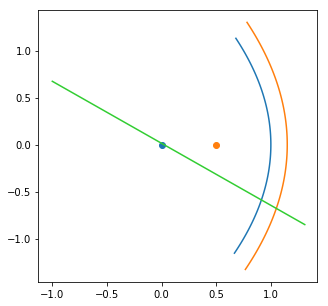

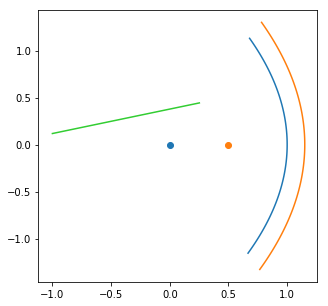

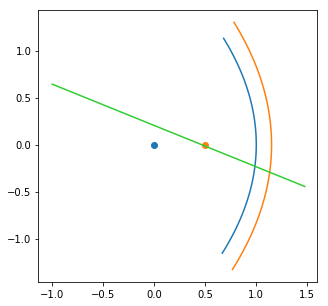

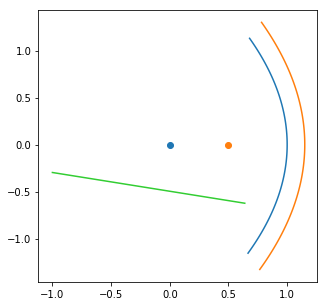

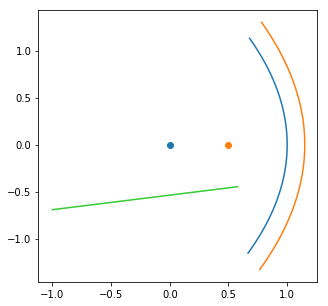

In [52]:
#Parabolic mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)
#En cartesianas y**2 = -4*(x-1)

plt.rcParams["figure.figsize"] = (5,5)

#random rays
x1 = -1.0*np.ones(40)
y1 = np.random.uniform(-1,1,40)
x2 = 0.6*np.ones(40)
y2 = np.random.uniform(-np.sqrt(2.4),np.sqrt(2.4),40)

#Interction sphere and line (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n - 2. + np.sqrt(2.*m*n + 4. + 4*m**2))/(m**2)
#dy = m*dx + n
  
dx_minu = dx - 0.001
dx_plus = dx + 0.001
dy_minu = m*dx_minu + n
dy_plus = m*dx_plus + n

tangentx = dx_plus - dx_minu
tangenty = dy_plus - dy_minu
alpha = np.arctan(tangentx/tangenty) #angle between tangent and incoming horizontal ray
reflectedx = -np.cos(2.*alpha) - dx #refelcted ray
reflectedy = np.sin(2.*alpha) - dy #refelcted ray

for i in range(0,len(dx)):
  plt.scatter([-1,1],[-1,1],color='white')
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  plt.plot(x,y) #mirror
  plt.plot(x*1.15,y*1.15) #mirror  
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen') #incident ray
  #plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen') #reflected ray
  plt.show()
  plt.close()